# Multiple Linear Regression
# For health data
# Goals: 
# - Run Multiple Linear Regression
# - Interpret Coefficient
# - Explain R Squared & Adjusted R Squared
# - Practice Backward Elimination
# Try this in a ipython notebook


In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [7]:
# Importing the dataset
# REVIEW
# Q: What does X represent? Why do you need to add a constant?
# A:
# Q: What does y represent?
# A:
dataset = pd.read_csv('~/Downloads/health_data.csv')

In [10]:
dataset.head(1)

,death rate per 1000 residents,doctor availability per 100 000 residents,hospital availability per 100 000 residents,annual per capita income in thousands of dollars,population density people per square mile
0,8,78,284,9.1,109


In [11]:
dataset.columns

Index([u'death rate per 1000 residents',
       u'doctor availability per 100 000 residents',
       u'hospital availability per 100 000 residents',
       u'annual per capita income in thousands of dollars',
       u'population density people per square mile'],
      dtype='object')

In [12]:
X = dataset.iloc[:, 1:5]

In [13]:
X.columns

Index([u'doctor availability per 100 000 residents',
       u'hospital availability per 100 000 residents',
       u'annual per capita income in thousands of dollars',
       u'population density people per square mile'],
      dtype='object')

In [17]:
X = dataset.iloc[:, 1:5]

In [18]:
y = dataset.iloc[:, 0].values

In [21]:
type(dataset.iloc[:, 0].values)

numpy.ndarray

In [22]:
type(dataset.iloc[:, 0])

pandas.core.series.Series

In [23]:
X = sm.add_constant(X)

In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test_michelle, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
X_train.shape

(42, 5)

In [31]:
X_test_michelle.shape

(11, 5)

In [36]:
train_model = sm.OLS(endog = y_train, exog = X_train).fit()
train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     1.914
Date:                Sat, 25 Aug 2018   Prob (F-statistic):              0.129
Time:                        10:49:48   Log-Likelihood:                -79.337
No. Observations:                  42   AIC:                             168.7
Df Residuals:                      37   BIC:                             177.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------------
const                                               12.3152      2.326      5.295      0.000         7.603    17.027
doctor availability per 100 000 residents            0.0073      0.008      0.920      0.363        -0.009     0.023
hospital availability per 100 000 residents          0.0008      0.001      1.027      0.311        -0.001     0.002
annual per capita income in thousands of dollars    -0.3258      0.269     -1.211      0.234        -0.871     0.219
population density people per square mile           -0.0108      0.006     -1.866      0.070        -0.023     0.001
==============================================================================
Omnibus:                       17.332   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.349
Skew:                          -1.315   Prob(JB):                     1.40e-05
Kurtosis:                       5.419   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
train_model.predict(X_test)

array([ 10.10478132,   9.68000462,   8.84702943,   9.74088989,
         8.69956111,   9.86249562,   9.64624096,   9.75831054,
         9.02185963,   9.36070494,   8.31196194])

In [38]:
train_model

In [39]:
X_test.head(1)

,const,doctor availability per 100 000 residents,hospital availability per 100 000 residents,annual per capita income in thousands of dollars,population density people per square mile
43,1,183,718,10.4,69


In [40]:
12.3152+0.0073*183+ 0.0008*718-0.3258*10.4-0.0108*69

10.091980000000001

In [41]:
y_test

array([  8.39999962,   9.80000019,   7.30000019,  10.80000019,
         8.30000019,   7.5       ,   9.80000019,   9.80000019,
         8.39999962,   9.10000038,  10.19999981])

In [42]:
train_model.predict(X_test)

array([ 10.10478132,   9.68000462,   8.84702943,   9.74088989,
         8.69956111,   9.86249562,   9.64624096,   9.75831054,
         9.02185963,   9.36070494,   8.31196194])

In [ ]:
# Q: What is the R-squared of this model? Adjusted r-squared? Interpret. 


In [43]:
# NEW
# Now let's do backwards elimination
# Full model (model #1). r-squared:  0.144
# adjusted r-squared: 0.072
X_opt = X
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.014
Date:                Sat, 25 Aug 2018   Prob (F-statistic):              0.107
Time:                        11:47:50   Log-Likelihood:                -97.530
No. Observations:                  53   AIC:                             205.1
Df Residuals:                      48   BIC:                             214.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------------
const                                               12.2663      2.020      6.072      0.000         8.204    16.328
doctor availability per 100 000 residents            0.0074      0.007      1.066      0.292        -0.007     0.021
hospital availability per 100 000 residents          0.0006      0.001      0.809      0.423        -0.001     0.002
annual per capita income in thousands of dollars    -0.3302      0.235     -1.408      0.166        -0.802     0.141
population density people per square mile           -0.0095      0.005     -1.936      0.059        -0.019     0.000
==============================================================================
Omnibus:                       18.172   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.184
Skew:                          -1.200   Prob(JB):                     3.40e-06
Kurtosis:                       5.376   Cond. No.                     6.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
dataset.columns

Index([u'death rate per 1000 residents',
       u'doctor availability per 100 000 residents',
       u'hospital availability per 100 000 residents',
       u'annual per capita income in thousands of dollars',
       u'population density people per square mile'],
      dtype='object')

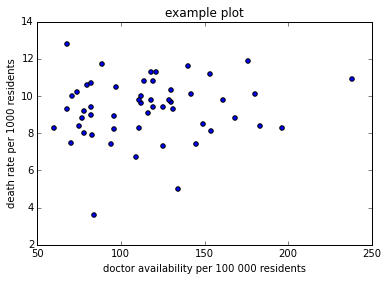

In [67]:
plt.scatter(dataset.iloc[:,1],dataset.iloc[:,0])
plt.xlabel('doctor availability per 100 000 residents')
plt.ylabel('death rate per 1000 residents')
plt.title('example plot')

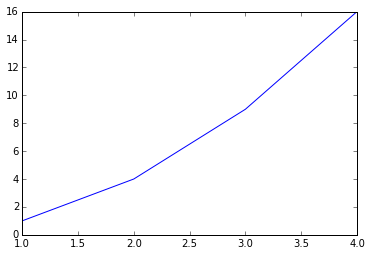

In [57]:
%matplotlib inline
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

In [69]:
# Full model minus hospital availability (model #2). r-squared:  0.132
# adjusted r-squared: 0.079
X_opt = X[['population density people per square mile', \
    'annual per capita income in thousands of dollars',\
    'doctor availability per 100 000 residents', 'const']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     2.485
Date:                Sat, 25 Aug 2018   Prob (F-statistic):             0.0716
Time:                        13:08:13   Log-Likelihood:                -97.888
No. Observations:                  53   AIC:                             203.8
Df Residuals:                      49   BIC:                             211.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------------
population density people per square mile           -0.0086      0.005     -1.808      0.077        -0.018     0.001
annual per capita income in thousands of dollars    -0.3591      0.231     -1.555      0.126        -0.823     0.105
doctor availability per 100 000 residents            0.0093      0.007      1.428      0.160        -0.004     0.022
const                                               12.5659      1.979      6.350      0.000         8.589    16.543
==============================================================================
Omnibus:                       20.373   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.399
Skew:                          -1.301   Prob(JB):                     2.51e-07
Kurtosis:                       5.644   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# Full model minus hospital and doctor availability. (model 3)
#r-squared:  0.096
# adjusted r-squared: 0.060
# Q: Is this drop in features worth the loss in fit metrics? 
# A: 
# Q: Is your final model this one or previous model?
# A:  
X_opt = X[['population density people per square mile', \
    'annual per capita income in thousands of dollars',\
    'const']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.653
Date:                Sat, 25 Aug 2018   Prob (F-statistic):             0.0803
Time:                        13:07:59   Log-Likelihood:                -98.968
No. Observations:                  53   AIC:                             203.9
Df Residuals:                      50   BIC:                             209.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------------------
population density people per square mile           -0.0092      0.005     -1.916      0.061        -0.019     0.000
annual per capita income in thousands of dollars    -0.2142      0.210     -1.022      0.312        -0.635     0.207
const                                               12.3395      1.993      6.192      0.000         8.337    16.342
==============================================================================
Omnibus:                       19.143   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.791
Skew:                          -1.233   Prob(JB):                     9.23e-07
Kurtosis:                       5.550   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Titanic data

In [101]:
# TASK 1: read the data from titanic.csv into a DataFrame
import pandas as pd
titanic = pd.read_csv('~/Downloads/train.csv', index_col='PassengerId')

In [103]:
titanic.columns

Index([u'Survived', u'Pclass', u'Name', u'Sex', u'Age', u'SibSp', u'Parch',
       u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [132]:
# TASK 2: define Pclass/Parch as the features and Survived as the response

X = titanic[['Pclass', 'Parch']]
y = titanic.Survived

In [133]:
X.head()

,Pclass,Parch
PassengerId,,
1,3,0
2,1,0
3,3,0
4,1,0
5,3,0


In [134]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     1
13     0
14     0
15     0
16     1
17     0
18     1
19     0
20     1
21     0
22     1
23     1
24     1
25     0
26     1
27     0
28     0
29     1
30     0
      ..
862    0
863    1
864    0
865    0
866    1
867    1
868    0
869    0
870    1
871    0
872    1
873    0
874    0
875    1
876    1
877    0
878    0
879    0
880    1
881    1
882    0
883    0
884    0
885    0
886    0
887    0
888    1
889    0
890    1
891    0
Name: Survived, dtype: int64

In [135]:
X = sm.add_constant(X)

In [136]:
# TASK 3: split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [137]:
X_train.head()

,const,Pclass,Parch
PassengerId,,,
36,1,1,0
47,1,3,0
454,1,1,0
292,1,1,0
749,1,1,0


In [140]:
# TASK 4: fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

[('Pclass', 0.66174378933516298), ('Age', -0.88186220775377022)]

In [141]:
# TASK 5: make predictions on testing set and calculate accuracy
y_pred_class = logreg.predict(X_test)

from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred_class))

0.668161434978


In [145]:
X_test

,const,Pclass,Parch
PassengerId,,,
863,1,1,0
224,1,3,0
85,1,2,0
681,1,3,0
536,1,2,2
624,1,3,0
149,1,2,2
4,1,1,0
35,1,1,0


In [142]:
print metrics.accuracy_score(y_test, y_pred_class)

0.668161434978


In [89]:
y_pred_class = logreg.predict_proba(X_test)
#print metrics.roc_curve(y_test, y_pred_class)

In [93]:
y_pred_class[:,1]

array([ 0.60864673,  0.21046083,  0.39167872,  0.21046083,  0.56082798,
        0.21046083,  0.56082798,  0.60864673,  0.60864673,  0.21046083,
        0.21046083,  0.21046083,  0.60864673,  0.39167872,  0.21046083,
        0.60864673,  0.3458423 ,  0.21046083,  0.21046083,  0.64265704,
        0.21046083,  0.21046083,  0.60864673,  0.39167872,  0.21046083,
        0.21046083,  0.75517608,  0.39167872,  0.39167872,  0.60864673,
        0.21046083,  0.60864673,  0.59623718,  0.21046083,  0.21046083,
        0.3458423 ,  0.60864673,  0.21046083,  0.60864673,  0.21046083,
        0.21046083,  0.3458423 ,  0.68654576,  0.60864673,  0.56082798,
        0.21046083,  0.3458423 ,  0.39167872,  0.60864673,  0.39167872,
        0.39167872,  0.39167872,  0.39167872,  0.39167872,  0.21046083,
        0.21046083,  0.39167872,  0.60864673,  0.59623718,  0.21046083,
        0.3458423 ,  0.21046083,  0.47555224,  0.60864673,  0.60864673,
        0.3458423 ,  0.27293986,  0.21046083,  0.27293986,  0.47

In [97]:
metrics.roc_curve(y_test, y_pred_class[:,1])

(array([ 0.       ,  0.015625 ,  0.0234375,  0.0234375,  0.1484375,
         0.171875 ,  0.1796875,  0.203125 ,  0.3671875,  0.4375   ,
         0.4921875,  1.       ]),
 array([ 0.        ,  0.05263158,  0.08421053,  0.09473684,  0.43157895,
         0.43157895,  0.46315789,  0.47368421,  0.63157895,  0.66315789,
         0.71578947,  1.        ]),
 array([ 1.75517608,  0.75517608,  0.68654576,  0.64265704,  0.60864673,
         0.59623718,  0.56082798,  0.47555224,  0.39167872,  0.3458423 ,
         0.27293986,  0.21046083]))

In [100]:
metrics.roc_auc_score(y_test, y_pred_class[:,1])

0.66796875